In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import time 
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
epoch = 5

# Device will determine whether to run the training on GPU or CPU.
torch.cuda.is_available()

True

In [ ]:
# Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './dataset',
                                           train = True, 
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)), # 将训练图像大小resize成(32,32)
                                                  transforms.ToTensor(), #以张量形式存储
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]), 
                                                  #标准化，使训练集均值为0，标准差为1
                                           download = False)


test_dataset = torchvision.datasets.MNIST(root = './dataset',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                      transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=False)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [3]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.C1 = nn.Conv2d(1, 6, kernel_size = 5, padding = 0, stride = 1)
        self.ReLU = nn.ReLU()
        self.S2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.C3 = nn.Conv2d(6, 16, kernel_size = 5, padding = 0, stride = 1)
        self.relu = nn.ReLU()
        self.S4 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.C5 = nn.Conv2d(16, 120, kernel_size = 5, padding = 0, stride = 1)
        self.relu1 = nn.ReLU()
        self.F6 = nn.Linear(120, 84)
        self.F7 = nn.Linear(84, 10)
        
    def forward(self, x):
        out = self.C1(x)
        out = self.relu(out)
        out = self.S2(out)
        out = self.C3(out)
        out = self.relu(out)
        out = self.S4(out)
        out = self.C5(out)
        out = self.relu1(out)
        out = out.view(-1, 120)
        out = self.F6(out)
        out = self.relu1(out)
        out = self.F7(out)
        return out
    

In [4]:
#创建模型,使用gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)
#定义优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
def train_runner(model, device, trainloader, optimizer, epoch):
    #训练模型, 启用 BatchNormalization 和 Dropout, 将BatchNormalization和Dropout置为True
    model.train()
    total = 0
    correct =0.0
    #enumerate迭代已加载的数据集,同时获取数据和数据下标
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        #把模型部署到device上
        inputs, labels = inputs.to(device), labels.to(device)
        #初始化梯度
        optimizer.zero_grad()
        #保存训练结果
        outputs = model(inputs)
        #计算损失和
        #多分类情况通常使用cross_entropy(交叉熵损失函数), 而对于二分类问题, 通常使用sigmod
        loss = F.cross_entropy(outputs, labels)
        #获取最大概率的预测结果
        #dim=1表示返回每一行的最大值对应的列下标
        predict = outputs.argmax(dim=1)
        total += labels.size(0)
        correct += (predict == labels).sum().item()
        #反向传播
        loss.backward()
        #更新参数
        optimizer.step()
        if i % 1000 == 0:
            #loss.item()表示当前loss的数值
            print("Train Epoch{} \t Loss: {:.6f}, accuracy: {:.6f}%".format(epoch, loss.item(), 100*(correct/total)))
            Loss.append(loss.item())
            Accuracy.append(correct/total)
    return loss.item(), correct/total


In [6]:
def test_runner(model, device, testloader):
    model.eval()
    #统计模型正确率, 设置初始值
    correct = 0.0
    test_loss = 0.0
    total = 0
    #torch.no_grad将不会计算梯度, 也不会进行反向传播
    with torch.no_grad():
        for data, label in testloader:
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, label).item()
            predict = output.argmax(dim=1)
            #计算正确数量
            total += label.size(0)
            correct += (predict == label).sum().item()
        #计算损失值
        print("test_avarage_loss: {:.6f}, accuracy: {:.6f}%".format(test_loss/total, 100*(correct/total)))



start_time 2023-09-25 12:15:10
Train Epoch1 	 Loss: 2.300405, accuracy: 9.375000%
test_avarage_loss: 0.001150, accuracy: 97.480000%
end_time:  2023-09-25 12:15:32 

start_time 2023-09-25 12:15:32
Train Epoch2 	 Loss: 0.212074, accuracy: 93.750000%
test_avarage_loss: 0.000740, accuracy: 98.400000%
end_time:  2023-09-25 12:15:53 

start_time 2023-09-25 12:15:53
Train Epoch3 	 Loss: 0.099115, accuracy: 98.437500%
test_avarage_loss: 0.000537, accuracy: 98.760000%
end_time:  2023-09-25 12:16:13 

start_time 2023-09-25 12:16:13
Train Epoch4 	 Loss: 0.008425, accuracy: 100.000000%
test_avarage_loss: 0.000605, accuracy: 98.740000%
end_time:  2023-09-25 12:16:34 

start_time 2023-09-25 12:16:34
Train Epoch5 	 Loss: 0.107049, accuracy: 98.437500%
test_avarage_loss: 0.000639, accuracy: 98.560000%
end_time:  2023-09-25 12:16:55 

Finished Training


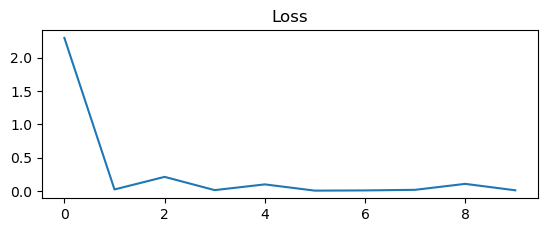

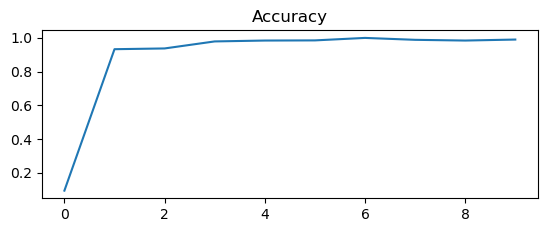

In [7]:

epoch = 5
Loss = []
Accuracy = []
for epoch in range(1, epoch+1):
    print("start_time",time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())))
    loss, acc = train_runner(model, device, train_loader, optimizer, epoch)
    Loss.append(loss)
    Accuracy.append(acc)
    test_runner(model, device, test_loader)
    print("end_time: ",time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time())),'\n')


print('Finished Training')
plt.subplot(2,1,1)
plt.plot(Loss)
plt.title('Loss')
plt.show()
plt.subplot(2,1,2)
plt.plot(Accuracy)
plt.title('Accuracy')
plt.show()

In [9]:
print(model)
torch.save(model, 'model-mnist.pth') #保存模型

LeNet5(
  (C1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (ReLU): ReLU()
  (S2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (C3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (S4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (C5): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (F6): Linear(in_features=120, out_features=84, bias=True)
  (F7): Linear(in_features=84, out_features=10, bias=True)
)


In [15]:
!pip install opencv-python

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


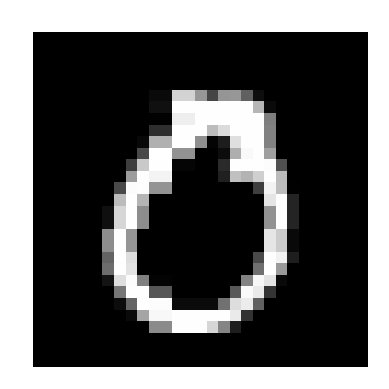

概率： tensor([[9.9999e-01, 5.5314e-08, 5.4166e-09, 3.4221e-08, 8.5611e-09, 2.0398e-06,
         7.9398e-06, 9.2607e-08, 8.2606e-07, 3.9280e-07]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
预测类别： 0


In [18]:
import cv2
if __name__ == '__main__':
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = torch.load('model-mnist.pth') #加载模型
    model = model.to(device)
    model.eval()    #把模型转为test模式


    #读取要预测的图片
    img = cv2.imread("test.png")
    img=cv2.resize(img,dsize=(32,32),interpolation=cv2.INTER_NEAREST)
    plt.imshow(img,cmap="gray") # 显示图片
    plt.axis('off') # 不显示坐标轴
    plt.show()


    # 导入图片，图片扩展后为[1，1，32，32]
    trans = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#图片转为灰度图，因为mnist数据集都是灰度图
    img = trans(img)
    img = img.to(device)
    img = img.unsqueeze(0)  #图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
    
    # 预测 
    output = model(img)
    prob = F.softmax(output,dim=1) #prob是10个分类的概率
    print("概率：",prob)
    value, predicted = torch.max(output.data, 1)
    predict = output.argmax(dim=1)
    print("预测类别：",predict.item())